 lpp value of objective function 0.0
 lpp value of objective function 0.0
 lpp value of objective function 0.0
 lpp value of objective function 0.0
 lpp value of objective function 0.0
 lpp value of objective function 0.0
 lpp value of objective function 0.0
 lpp value of objective function 0.0
 lpp value of objective function 0.0
 lpp value of objective function 0.0
 lpp value of objective function 0.0
 lpp value of objective function 0.0
 lpp value of objective function 0.0
 lpp value of objective function 0.0
 lpp value of objective function 0.0
 lpp value of objective function 0.0
 lpp value of objective function 0.0
 lpp value of objective function 0.0
 lpp value of objective function 0.0
 lpp value of objective function 0.0
 lpp value of objective function 0.0
 lpp value of objective function 0.0
 lpp value of objective function 0.0
 lpp value of objective function 0.0
 lpp value of objective function 0.0
 lpp value of objective function 0.0
 lpp value of objective function 0.0
 

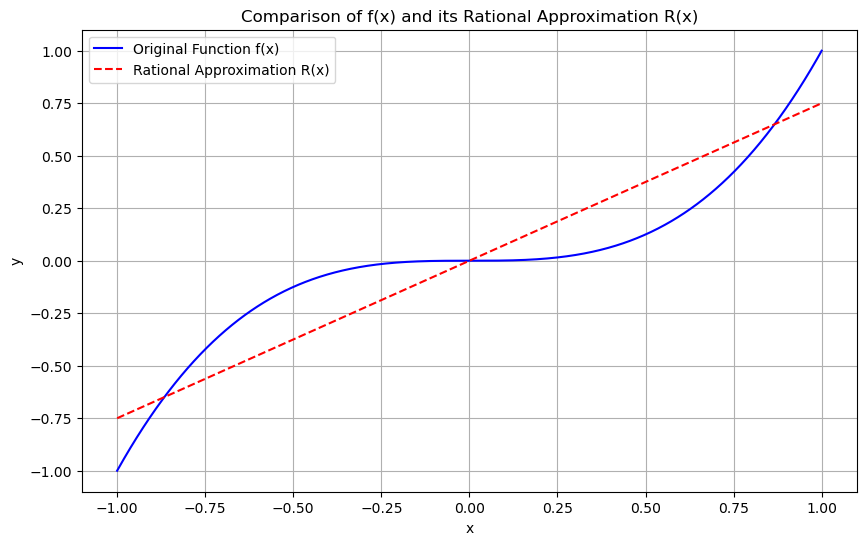

In [1]:
import numpy as np
import math
from scipy.optimize import linprog
import matplotlib.pyplot as plt

# Defining the target function
def f(x):
    #return 1 / (1 + 25 * x**2)
    #return x**3/(x**2 + 3)
    #return math.sqrt(abs(x - 0.25))
    return x ** 3

# Generating the Chebyshev nodes
def chebyshev_nodes(n):
    return np.cos((2 * np.arange(n) + 1) * np.pi / (2 * n))

# Check feasibility function 
def check_feasibility(f, m, n, z, t, delta=1e-6):
    
#     if not isinstance(delta, float) or delta <= 0:
#         raise ValueError("Delta must be a positive float.")
#     if not (isinstance(m, int) and isinstance(n, int)) or m <= 0 or n <= 0:
#         raise ValueError("m and n must be positive integers.")

    A = []
    b = []

    # Equations 9 and 10-type constraints
    for t_i in t:
        G = np.array([t_i**i for i in range(n)])
       # print(f'G(x) = {G}')
        H = np.array([t_i**i for i in range(m)])
        #   print(f'H(x) = {H}')

        f_ti = f(t_i)
        A.append(np.concatenate(([-1], -G, (f_ti - z) * H)))
        b.append(0)
        A.append(np.concatenate(([-1], G, -(f_ti + z) * H)))
        b.append(0)
    
    
    # Equation 11-type constraint
    for t_i in t:
        H = np.array([t_i**i for i in range(n)])
        A.append(np.concatenate(([0], np.zeros(m), -H)))
        b.append(-delta)
        
    

    # Objective function: Minimize the theta
    c = np.concatenate(([1], np.zeros(m + n)))     # Minimizing only theta c = [1,0,0,0,0,0,0,0,0] 
    
    # Linear programming problem
    lpp_result = linprog(c, A_ub=A, b_ub=b, bounds=None, method='highs')
    #print(f'lpp_result {lpp_result}')
    print(f' lpp value of objective function {lpp_result.fun}')

    
     # Checking feasibility and extracting coefficients
        
    if lpp_result.success:
         # Extracting coefficients for A and B
        #print(f'the value of theta {lpp_result.x[0]}')
        coefficients = lpp_result.x[1:]      # Excluding 0th element, since it corresponds to theta
        A_coefficients = coefficients[:m]    # Coefficients of A (numerator)    
        B_coefficients = coefficients[m:]    # Coefficients of B (denominator)
        return True, A_coefficients, B_coefficients
    else:
        return False, None, None


# Bisection algorithm function 
def bisection_algorithm(f, m, n, epsilon=1e-14, N=100):
    
    l = 0
    #u = 1
    t = chebyshev_nodes(N)
    u = 0.5 * np.max(np.abs(f(t))) - 0.5 * np.min(np.abs(f(t)))
    
    while abs(u - l) > epsilon:
        z = abs((u + l) / 2)
        #print(f" u = {u}, l = {l}, z = {z}")
        feasible, _, _ = check_feasibility(f, m, n, z, t)  
        if feasible:
            u = z
        else:
            l = z

    final_feasible, A_coefficients, B_coefficients = check_feasibility(f, m, n, l, t)  
    return final_feasible, l, A_coefficients, B_coefficients


# New function to plot the original function and its rational approximation
def plot_rational_approximation(f, A_coeffs, B_coeffs, N=1000):
    x_values = np.linspace(-1, 1, N)
    f_values = f(x_values)

    A_values = np.polyval(A_coeffs[::-1], x_values)  # Reversing coefficients for np.polyval because np.polyval expects them in descending order of powers
    B_values = np.polyval(B_coeffs[::-1], x_values)
    R_values = A_values / B_values

    plt.figure(figsize=(10, 6))
    plt.plot(x_values, f_values, label='Original Function f(x)', color='blue')
    plt.plot(x_values, R_values, label='Rational Approximation R(x)', color='red', linestyle='--')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Comparison of f(x) and its Rational Approximation R(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main execution
feasible, optimal_z, A_coeffs, B_coeffs = bisection_algorithm(f, 2, 2)
if feasible:
    print("Feasible solution found at z =", optimal_z)
    print("A coefficients:", A_coeffs)
    print("B coefficients:", B_coeffs)
    plot_rational_approximation(f, A_coeffs, B_coeffs)
else:
    print("No feasible solution found.")


